In [99]:
import json
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [100]:
def lire_fichier (chemin):
    with open(chemin) as json_data: 
        texte =json.load(json_data)
    return texte

# Graphique boite à moustache pour les distances sur tous le corpus

../ELTeC-fra_REN_Distances
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Tess. fr 3.10
version :  Tess. fr 3.10
version :  Tess. fr 3.10
version :  Tess. fr 3.10
version :  Tess. fr 3.10
version :  Tess. fr 3.10
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Kraken Lectp. 4.3.13
version :  Tess. fr 3.10
version :  Tess. fr 3.10
version :  Tess. fr 3.10
version :  Tess. fr 3.10
version :  Tess. fr 3.10
version :  Tes

,Auteur,Configuration,Distance cosinus,Metric,REN
1175,MIRBEAU_La-Marechale-moeurs-parisiennes,Kraken 4.3.13,0.203843,cosinus,stanza-fr-1.8.2
509,FEUILLET_La-petite-Comtesse,Kraken 4.3.13,0.378857,cosinus,stanza-fr-1.8.2
1157,MILLE_Louise-et-Barnavaux,Kraken 4.3.13,0.148750,cosinus,stanza-fr-1.8.2
491,ERCKMANN_Madame-Therese-ou-Les-volontaires,Kraken 4.3.13,0.258240,cosinus,stanza-fr-1.8.2
473,EEKHOUD_Lautre-vue,Kraken 4.3.13,0.267877,cosinus,stanza-fr-1.8.2
...,...,...,...,...,...
467,DUMAS_La-reine-Margot-1,Tess. fr 3.10,0.045290,cosinus,stanza-fr-1.8.2
521,FEUILLET_La-petite-Comtesse,Tess. fr 3.10,0.509886,cosinus,stanza-fr-1.8.2
1169,MILLE_Louise-et-Barnavaux,Tess. fr 3.10,0.294051,cosinus,stanza-fr-1.8.2
503,ERCKMANN_Madame-Therese-ou-Les-volontaires,Tess. fr 3.10,0.042423,cosinus,stanza-fr-1.8.2


/tmp/ipykernel_14463/2615090156.py:287: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2615090156.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
1174,MIRBEAU_La-Marechale-moeurs-parisiennes,Kraken 4.3.13,0.132291,cosinus,spacy-sm-3.7.5
508,FEUILLET_La-petite-Comtesse,Kraken 4.3.13,0.380690,cosinus,spacy-sm-3.7.5
1156,MILLE_Louise-et-Barnavaux,Kraken 4.3.13,0.427230,cosinus,spacy-sm-3.7.5
490,ERCKMANN_Madame-Therese-ou-Les-volontaires,Kraken 4.3.13,0.343082,cosinus,spacy-sm-3.7.5
472,EEKHOUD_Lautre-vue,Kraken 4.3.13,0.286179,cosinus,spacy-sm-3.7.5
...,...,...,...,...,...
1204,MONTAGNE_Le-Batard-de-Ravaillac,Tess. fr 3.10,0.564309,cosinus,spacy-sm-3.7.5
466,DUMAS_La-reine-Margot-1,Tess. fr 3.10,0.035551,cosinus,spacy-sm-3.7.5
520,FEUILLET_La-petite-Comtesse,Tess. fr 3.10,0.622223,cosinus,spacy-sm-3.7.5
1168,MILLE_Louise-et-Barnavaux,Tess. fr 3.10,0.158322,cosinus,spacy-sm-3.7.5


/tmp/ipykernel_14463/2615090156.py:287: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2615090156.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
1173,MIRBEAU_La-Marechale-moeurs-parisiennes,Kraken 4.3.13,0.162118,cosinus,spacy-md-3.7.5
507,FEUILLET_La-petite-Comtesse,Kraken 4.3.13,0.429869,cosinus,spacy-md-3.7.5
1155,MILLE_Louise-et-Barnavaux,Kraken 4.3.13,0.414534,cosinus,spacy-md-3.7.5
471,EEKHOUD_Lautre-vue,Kraken 4.3.13,0.337749,cosinus,spacy-md-3.7.5
1191,MONTAGNE_Le-Batard-de-Ravaillac,Kraken 4.3.13,0.414331,cosinus,spacy-md-3.7.5
...,...,...,...,...,...
465,DUMAS_La-reine-Margot-1,Tess. fr 3.10,0.046383,cosinus,spacy-md-3.7.5
1185,MIRBEAU_La-Marechale-moeurs-parisiennes,Tess. fr 3.10,0.042608,cosinus,spacy-md-3.7.5
519,FEUILLET_La-petite-Comtesse,Tess. fr 3.10,0.261395,cosinus,spacy-md-3.7.5
501,ERCKMANN_Madame-Therese-ou-Les-volontaires,Tess. fr 3.10,0.043883,cosinus,spacy-md-3.7.5


/tmp/ipykernel_14463/2615090156.py:287: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2615090156.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
1172,MIRBEAU_La-Marechale-moeurs-parisiennes,Kraken 4.3.13,0.174616,cosinus,spacy-lg-3.7.5
506,FEUILLET_La-petite-Comtesse,Kraken 4.3.13,0.446115,cosinus,spacy-lg-3.7.5
1154,MILLE_Louise-et-Barnavaux,Kraken 4.3.13,0.332287,cosinus,spacy-lg-3.7.5
488,ERCKMANN_Madame-Therese-ou-Les-volontaires,Kraken 4.3.13,0.288135,cosinus,spacy-lg-3.7.5
1208,MONTEPIN_La-porteuse-de-pain,Kraken 4.3.13,0.282933,cosinus,spacy-lg-3.7.5
...,...,...,...,...,...
1202,MONTAGNE_Le-Batard-de-Ravaillac,Tess. fr 3.10,0.401455,cosinus,spacy-lg-3.7.5
1184,MIRBEAU_La-Marechale-moeurs-parisiennes,Tess. fr 3.10,0.037632,cosinus,spacy-lg-3.7.5
518,FEUILLET_La-petite-Comtesse,Tess. fr 3.10,0.296824,cosinus,spacy-lg-3.7.5
1166,MILLE_Louise-et-Barnavaux,Tess. fr 3.10,0.007275,cosinus,spacy-lg-3.7.5


/tmp/ipykernel_14463/2615090156.py:287: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2615090156.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
0,ACHARD_Belle-rose,Kraken 4.3.13,0.095628,cosinus,camembert-4.41.1
1170,MIRBEAU_La-Marechale-moeurs-parisiennes,Kraken 4.3.13,0.227762,cosinus,camembert-4.41.1
504,FEUILLET_La-petite-Comtesse,Kraken 4.3.13,0.528413,cosinus,camembert-4.41.1
1152,MILLE_Louise-et-Barnavaux,Kraken 4.3.13,0.166884,cosinus,camembert-4.41.1
1206,MONTEPIN_La-porteuse-de-pain,Kraken 4.3.13,0.271927,cosinus,camembert-4.41.1
...,...,...,...,...,...
1200,MONTAGNE_Le-Batard-de-Ravaillac,Tess. fr 3.10,0.425219,cosinus,camembert-4.41.1
1182,MIRBEAU_La-Marechale-moeurs-parisiennes,Tess. fr 3.10,0.207726,cosinus,camembert-4.41.1
516,FEUILLET_La-petite-Comtesse,Tess. fr 3.10,0.512867,cosinus,camembert-4.41.1
1164,MILLE_Louise-et-Barnavaux,Tess. fr 3.10,0.078242,cosinus,camembert-4.41.1


/tmp/ipykernel_14463/2615090156.py:287: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2615090156.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


,Auteur,Configuration,Distance cosinus,Metric,REN
1171,MIRBEAU_La-Marechale-moeurs-parisiennes,Kraken 4.3.13,0.103689,cosinus,flair-0.13.1
505,FEUILLET_La-petite-Comtesse,Kraken 4.3.13,0.354239,cosinus,flair-0.13.1
1153,MILLE_Louise-et-Barnavaux,Kraken 4.3.13,0.101908,cosinus,flair-0.13.1
1207,MONTEPIN_La-porteuse-de-pain,Kraken 4.3.13,0.168488,cosinus,flair-0.13.1
469,EEKHOUD_Lautre-vue,Kraken 4.3.13,0.227561,cosinus,flair-0.13.1
...,...,...,...,...,...
1183,MIRBEAU_La-Marechale-moeurs-parisiennes,Tess. fr 3.10,0.023817,cosinus,flair-0.13.1
517,FEUILLET_La-petite-Comtesse,Tess. fr 3.10,0.318701,cosinus,flair-0.13.1
1165,MILLE_Louise-et-Barnavaux,Tess. fr 3.10,0.022323,cosinus,flair-0.13.1
337,CARRAUD_petite-Jeanne,Tess. fr 3.10,0.011863,cosinus,flair-0.13.1


/tmp/ipykernel_14463/2615090156.py:287: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
/tmp/ipykernel_14463/2615090156.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,


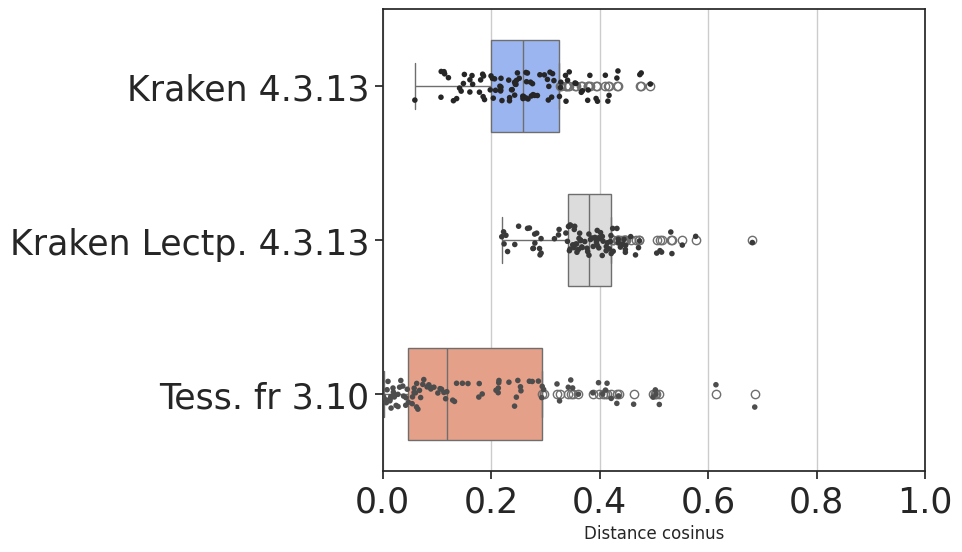

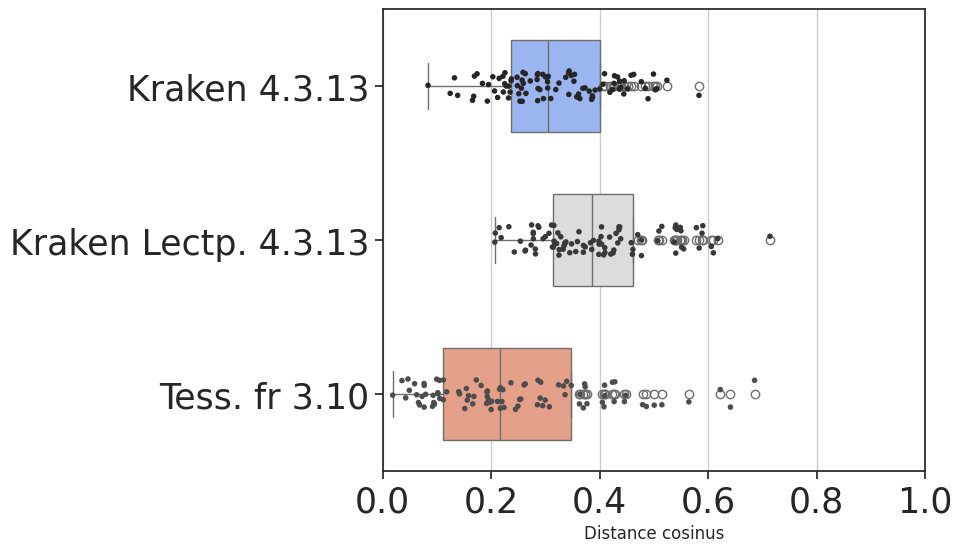

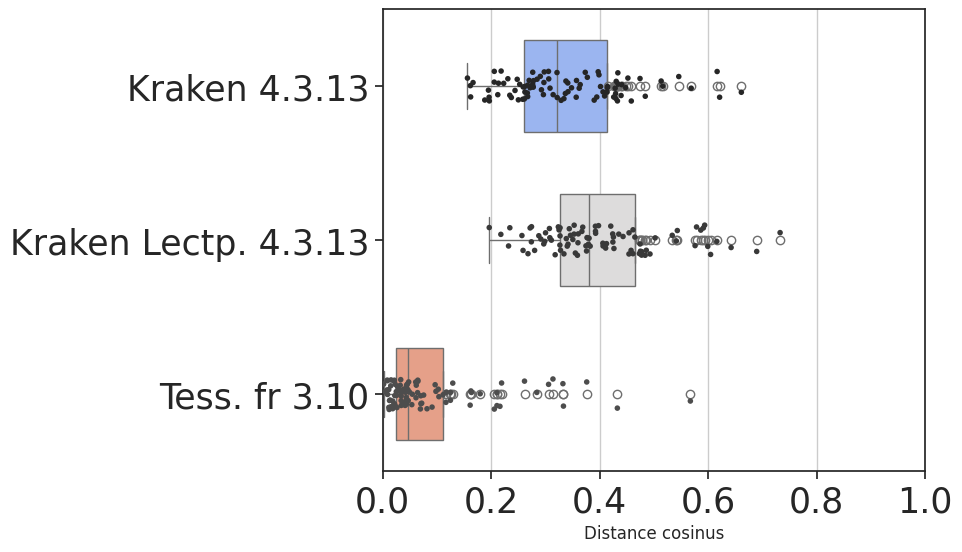

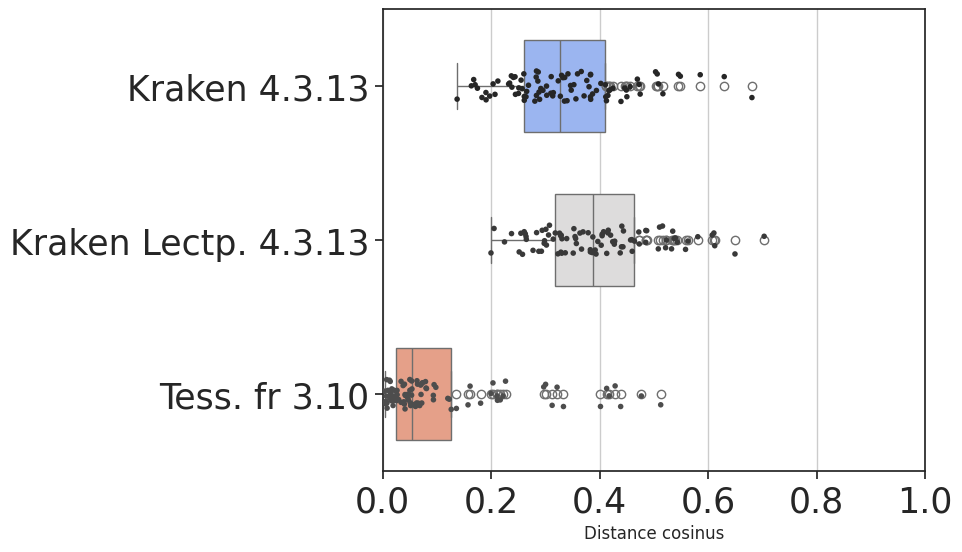

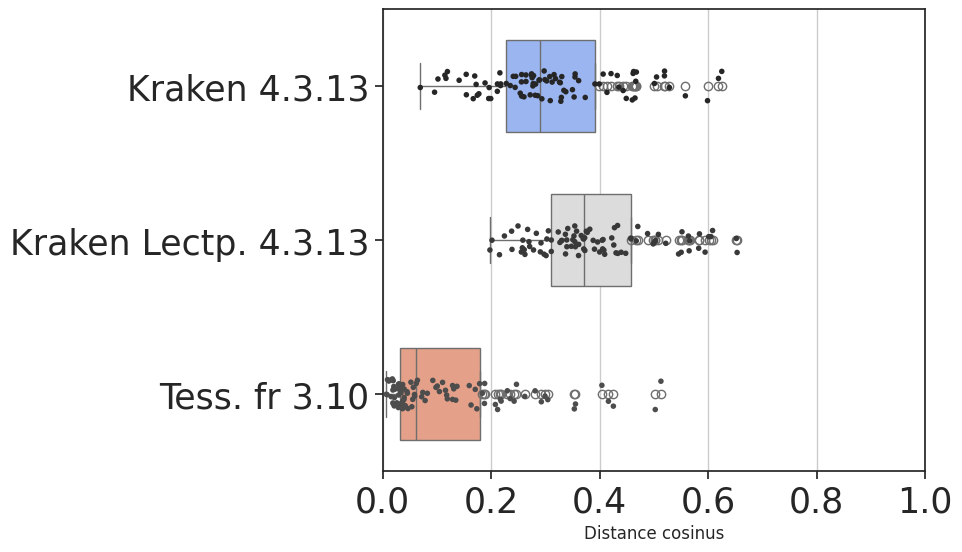

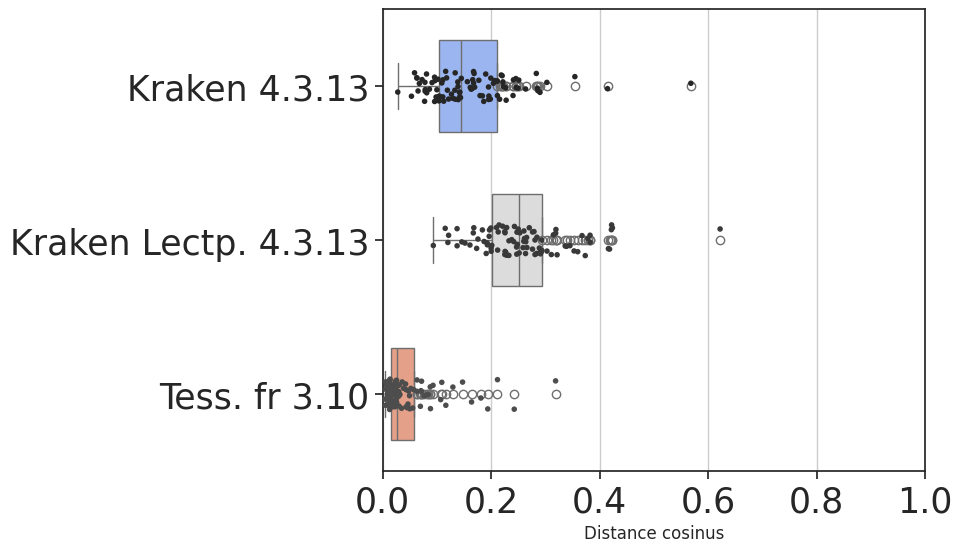

In [181]:
calcul=["sim2-3","word"]
calc=calcul[0]
liste_cle=["cosinus","jaccard"]
cle=liste_cle[0]
x=1

# path_data = f"../{version_doc}_Distances/*/*OCR/*/SIM/{calc}*.json"## Text
# path_data =f"../ARCHEO_Distances/small-*fra-2021*/*/*/*OCR/*/NER/SIM/{calc}*.json"## NER ARCHEO
# path_data =f"../small-*/*/*OCR/*/NER/SIM/{calc}*.json"## NER
path_data =f"../ELTeC-*"## NER

for path_corpus in glob.glob(path_data):
    print(path_corpus)
    tableau={}
    liste_version_spacy=[]
    liste_config=[]
    liste_dist=[]
    liste_auteur=[]
    liste_name_metric=[]
    liste_version_ren=[]
    liste_archeo_version_ren=[]
    for path in glob.glob(f"{path_corpus}/*/*OCR/*/NER/SIM/{calc}*.json"):
        # print(path)
        corpus=path.split("/")[1]
        # print(corpus)
        autor=path.split("/")[2]
        # autor=autor.split("_")[0]
        # print(autor)
        version=path.split("/")[4]
        version=version.split("_")[-1]
        # print(version)
        vers_ren=path.split("_")[-1].split("-liste.json")[0]
        # print(vers_ren)
        distance=lire_fichier(path)
        # print(distance)
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
    #     archeo_ren=vers_ren.split("-")[1]
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
    
    
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
    # ##Kraken
    #     ##Kraken fr 
    #     if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
    #         version=re.sub("Kraken-base.txt|kraken|Kraken",f"Kraken -- {vers_ren}",version)
    #         print("Version : ", version)
    #     
    #     if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
    #         version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain",f"Kraken--jspl-fr -- {vers_ren}",version)
    #         print("Version : ", version)
    #         
    #     if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
    #         version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC",f"Kraken--jspl-ELTeCfr -- {vers_ren}",version)
    #         print("Version : ", version)    
    # 
    #     if version == "kraken4.3.13.dev25":
    #         version = re.sub("kraken4.3.13.dev25", f"Kraken 4.3.13 -- {vers_ren}", version)
    #         print("version : ", version)
    # 
    #     if version == "kraken4.3.13.dev25-jspll-pretrain":
    #         version = re.sub("kraken4.3.13.dev25-jspll-pretrain", f"Kraken 4.3.13--jspl-fr -- {vers_ren}", version)
    #         print("version : ", version)
    # 
    #     if version == "kraken4.3.13.dev25-jspll-ELTeC":
    #         version = re.sub("kraken4.3.13.dev25-jspll-ELTeC", f"Kraken 4.3.13--jspl-ELTeCfr -- {vers_ren}", version)
    #         print("version : ", version)
    # 
    #     if version == "lectaurep-kraken4.3.13.dev25":
    #         version = re.sub("lectaurep-kraken4.3.13.dev25", f"Kraken Lectp. 4.3.13 -- {vers_ren}", version)
    #         print("version : ", version)
    # 
    #     if version == "lectaurep-kraken4.3.13.dev25-jspll-pretrain":
    #         version = re.sub("lectaurep-kraken4.3.13.dev25-jspll-pretrain", f"Kraken Lectp. 4.3.13--jspl-fr -- {vers_ren}", version)
    #         print("version : ", version)
    # 
    #     if version == "lectaurep-kraken4.3.13.dev25-jspll-ELTeC":
    #         version = re.sub("lectaurep-kraken4.3.13.dev25-jspll-ELTeC", f"Kraken Lectp. 4.3.13--jspl-ELTeCfr -- {vers_ren}", version)
    #         print("version : ", version)
    #     
    #     ##Kraken en
    #     
    #     if  version=="Kraken-jspll-ELTeC":
    #         version=re.sub("Kraken-jspll-ELTeC",f"Kraken--jspl-ELTeCen -- {vers_ren}",version)
    #         print("Version : ", version)
    #     if  version=="Kraken-jspll-pretrain":
    #         version=re.sub("Kraken-jspll-pretrain",f"Kraken--jspl-en -- {vers_ren}",version)
    #         print("Version : ", version)
    #         
    #     ##Kraken pt
    #     if  version=="Kraken-jspl-ELTeC":
    #         version=re.sub("Kraken-jspl-ELTeC",f"Kraken--jspl-ELTeCpt -- {vers_ren}",version)
    #         print("Version : ", version)
    # ##Tess
    #     ##Tess fr 
    #     if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
    #         version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png",f"Tess. fr -- {vers_ren}",version)
    #         print("Version : ", version)
    # 
    #     if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
    #             version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain",f"Tess. fr--jspl-fr -- {vers_ren}",version)
    #             print("Version : ", version)
    #     
    #     if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
    #         version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC",f"Tess. fr--jspl-ELTeCfr -- {vers_ren}",version)
    #         print("Version : ", version)
    #     
    #     if version == "tesseract0.3.10":
    #         version = re.sub("tesseract0.3.10", f"Tess. fr 3.10 -- {vers_ren}", version)
    #         print("version : ", version)
    # 
    #     if version == "tesseract0.3.10-jspll-pretrain":
    #         version = re.sub("tesseract0.3.10-jspll-pretrain", f"Tess. fr 3.10--jspl-fr -- {vers_ren}", version)
    #         print("version : ", version)
    # 
    #     if version == "tesseract0.3.10-jspll-ELTeC":
    #         version = re.sub("tesseract0.3.10-jspll-ELTeC", f"Tess. fr 3.10--jspl-ELTeCfr -- {vers_ren}", version)
    #         print("version : ", version)
    #         
    #     ##Tess en
    #     if version=="tesseract" or version=="Tesseract-PNG":
    #          version=re.sub("tesseract|Tesseract-PNG",f"Tess. -- {vers_ren}",version)###ATTENTION à LA LANGUE
    #          print("Version : ", version)
    #     
    #     if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
    #         version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain",f"Tess.--jspl-en -- {vers_ren}",version)
    #         print("Version : ", version)
    #         
    #     if  version=="Tesseract-PNG-jspll-ELTeC":
    #         version=re.sub("Tesseract-PNG-jspll-ELTeC",f"Tess.--jspl-ELTeCen -- {vers_ren}",version)
    #         print("Version : ", version)
    #     
    #     if version == "tesseract0.3.10":
    #         version = re.sub("tesseract0.3.10", f"Tess. fr 3.10 -- {vers_ren}", version)
    #         print("version : ", version)
    #     
    #     ##Tess pt 
    #     
    #     if version=="TesseractPor-PNG":
    #         version=re.sub("TesseractPor-PNG",f"Tess. pt -- {vers_ren}",version)
    #         print("Version : ", version) 
    #     
    #     if version =="TesseractPor-PNG-jspl-ELTeC":
    #         version=re.sub("TesseractPor-PNG-jspl-ELTeC",f"Tess. pt--jspl-ELTeCpt -- {vers_ren}",version)
    #         print("Version : ", version)
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
    
    
        if version=="Kraken-base.txt" or version=="kraken" or version=="Kraken" :
            version=re.sub("Kraken-base.txt|kraken|Kraken",f"Kraken",version)
            print("Version : ", version)
    
        if version=="kraken-jspll-pretrain.txt" or version=="kraken-jspll-pretrain":
            version=re.sub("kraken-jspll-pretrain.txt|kraken-jspll-pretrain","Kraken--jspl-fr",version)
            print("Version : ", version)
        if version=="Kraken-jspll-pretrain":
            version=re.sub("Kraken-jspll-pretrain","Kraken--jspl-en",version)
            print("Version : ", version)
    
        if version=="kraken-jspll-ELTeC.txt" or version=="kraken-jspll-ELTeC" :
            version=re.sub("kraken-jspll-ELTeC.txt|kraken-jspll-ELTeC","Kraken--jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Kraken-jspll-ELTeC":
            version=re.sub("Kraken-jspll-ELTeC","Kraken--jspl-ELTeCen",version)
            print("Version : ", version)
        if  version=="Kraken-jspl-ELTeC":
            version=re.sub("Kraken-jspl-ELTeC","Kraken--jspl-ELTeCpt",version)
            print("Version : ", version)
    
        if version=="TesseractFra-PNG.txt" or version=="TesseractFra-PNG" or version=="TesseractFra-png":
            version=re.sub("TesseractFra-PNG.txt|TesseractFra-PNG|TesseractFra-png",f"Tess. fr",version)
            print("Version : ", version)
    
        if version=="tesseract" or version=="Tesseract-PNG":
             version=re.sub("tesseract|Tesseract-PNG","Tess.",version)###ATTENTION à LA LANGUE
             print("Version : ", version)
    
        if version=="TesseractPor-PNG":
            version=re.sub("TesseractPor-PNG","Tess. pt",version)
            print("Version : ", version)
    
        if version=="TesseractFra-PNG-jspll-pretrain.txt" or version=="TesseractFra-PNG-jspll-pretrain":
            version=re.sub("TesseractFra-PNG-jspll-pretrain.txt|TesseractFra-PNG-jspll-pretrain","Tess. fr -- jspl-fr",version)
            print("Version : ", version)
    
        if  version=="tesseract-jspll-pretrain" or version =="Tesseract-PNG-jspll-pretrain" :
            version=re.sub("tesseract-jspll-pretrain|Tesseract-PNG-jspll-pretrain","Tess. -- jspl-en",version)
            print("Version : ", version)
    
        if version=="TesseractFra-PNG-jspll-ELTeC.txt" or version=="TesseractFra-PNG-jspll-ELTeC":
            version=re.sub("TesseractFra-PNG-jspll-ELTeC.txt|TesseractFra-PNG-jspll-ELTeC","Tess. fr -- jspl-ELTeCfr",version)
            print("Version : ", version)
        if  version=="Tesseract-PNG-jspll-ELTeC":
            version=re.sub("Tesseract-PNG-jspll-ELTeC","Tess. -- jspl-ELTeCen",version)
            print("Version : ", version)
        if version =="TesseractPor-PNG-jspl-ELTeC":
            version=re.sub("TesseractPor-PNG-jspl-ELTeC","Tess. pt -- jspl-ELTeCpt",version)
            print("Version : ", version)
    
        if version == "tesseract0.3.10":
            version = re.sub("tesseract0.3.10", "Tess. fr 3.10", version)
            print("version : ", version)
    
        if version == "tesseract0.3.10-jspll-pretrain":
            version = re.sub("tesseract0.3.10-jspll-pretrain", "Tess. fr 3.10 -- jspl-fr", version)
            print("version : ", version)
    
        if version == "tesseract0.3.10-jspll-ELTeC":
            version = re.sub("tesseract0.3.10-jspll-ELTeC", "Tess. fr 3.10 -- jspl-ELTeCfr", version)
            print("version : ", version)
    
        if version == "kraken4.3.13.dev25":
            version = re.sub("kraken4.3.13.dev25", "Kraken 4.3.13", version)
            print("version : ", version)
    
        if version == "kraken4.3.13.dev25-jspll-pretrain":
            version = re.sub("kraken4.3.13.dev25-jspll-pretrain", "Kraken 4.3.13 -- jspl-fr", version)
            print("version : ", version)
    
        if version == "kraken4.3.13.dev25-jspll-ELTeC":
            version = re.sub("kraken4.3.13.dev25-jspll-ELTeC", "Kraken 4.3.13 -- jspl-ELTeCfr", version)
            print("version : ", version)
    
        if version == "lectaurep-kraken4.3.13.dev25":
            version = re.sub("lectaurep-kraken4.3.13.dev25", "Kraken Lectp. 4.3.13", version)
            print("version : ", version)
    
        if version == "lectaurep-kraken4.3.13.dev25-jspll-pretrain":
            version = re.sub("lectaurep-kraken4.3.13.dev25-jspll-pretrain", "Kraken Lectp. 4.3.13 -- jspl-fr", version)
            print("version : ", version)
    
        if version == "lectaurep-kraken4.3.13.dev25-jspll-ELTeC":
            version = re.sub("lectaurep-kraken4.3.13.dev25-jspll-ELTeC", "Kraken Lectp. 4.3.13 -- jspl-ELTeCfr", version)
            print("version : ", version)
    
        # liste_distance=[]
        for key, res_dist in distance.items():
            # print("Key : ",key)
            if key == cle:
            # if key == "jaccard":
                for r in res_dist:
                    liste_name_metric.append(key)
                    liste_config.append(version)#+"--"+paire)
                    liste_auteur.append(autor)
                    liste_dist.append(r)
                    liste_version_ren.append(vers_ren)
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
    #                 liste_archeo_version_ren.append(archeo_ren)
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________

    tableau["Auteur"]=liste_auteur
    tableau["Configuration"]=liste_config
    tableau[f"Distance {cle}"]=liste_dist
    tableau["Metric"]=liste_name_metric
    tableau["REN"]=liste_version_ren
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
    # tableau["ArcheoREN"]=liste_archeo_version_ren
    # #_______________ARCHEOLOGIE DE SPACY _____________________________________________________
    data_tab = pd.DataFrame(tableau)
    data_tab=data_tab.sort_values(by = 'Configuration')
    # display(data_tab)
    
    #_____________NER Multi Modèles___________________________
    REN_liste=set(tableau["REN"])
    for r in REN_liste:
        data_tab1=data_tab.query('REN == @r ')
        display(data_tab1)
    #_____________NER Multi Modèles___________________________
        
    ## _______________ARCHEOLOGIE DE SPACY ___________________
    # REN_liste=set(tableau["ArcheoREN"])
    # for r in REN_liste:
    #     data_tab1=data_tab.query('ArcheoREN == @r ')
    #     display(data_tab1)
    ## _______________ARCHEOLOGIE DE SPACY ___________________
        sns.set_theme(style="ticks")
        
        # Initialize the figure with a logarithmic x axis
        f, ax = plt.subplots(figsize=(7,6))
        ax.set_xscale("linear")
        
        # Load the example planets dataset
        # planets = sns.load_dataset("planets")
        
        # Plot the orbital period with horizontal boxes
        # sns.boxplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")],  y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
        #             whis=[0, 100], width=.6, palette="vlag")
        sns.boxplot(x=f"Distance {cle}",  y="Configuration", data=data_tab1,
                whis=[0, 1], width=.6, palette="coolwarm")#, legend=False)
        
        # Add in points to show each observation
        # sns.stripplot(x=data_tab.Distance[(data_tab.Metric=="cosinus") & (data_tab.Configuration=="kraken--lg--lg")], y=data_tab.Configuration[data_tab.Configuration=="kraken--lg--lg"], data=data_tab,
        #               size=4, color=".3", linewidth=0)
        sns.stripplot(x=f"Distance {cle}", y="Configuration", data=data_tab1,
                  size=4, palette='dark:.3', linewidth=0)#, legend=False)
        
        # Tweak the visual presentation
        plt.tick_params(axis = 'both', labelsize = 25)
        ax.xaxis.grid(True)
        ax.set(ylabel="")
        plt.xlim([0,x])
        
        
            #
            #
        # sns.despine(trim=True, left=True)
        # plt.savefig(f"../Boite-a_moustache/{version_doc}_{calc}.png",dpi=300, bbox_inches="tight")##Texte
        # plt.savefig(f"../ARCHEO_Distances/Boite-a_moustache/{corpus}_spaCy-{r}_{cle}-{calc}.png",dpi=300, bbox_inches="tight")##NER Archéo
        plt.savefig(f"../Boite-a_moustache/{corpus}_{r}_{cle}-{calc}.png",dpi=300, bbox_inches="tight")##NER Multi Modèles

In [102]:
# !python --version